<a href="https://colab.research.google.com/github/dcsgod/MentalFitnessTracker_IBM/blob/main/IBMproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Load the datasets
df_dalys = pd.read_csv('daly.csv')
df_prevalence = pd.read_csv('pd.csv')

In [5]:
df_merged = pd.merge(df_dalys, df_prevalence, on=['Entity', 'Code', 'Year'])


In [20]:
# Feature Engineering
# Select relevant features for mental fitness tracking
features = [ 'Schizophrenia','Bipolar disorder','Eating disorders',' Anxiety disorders','Drug use disorders','Depressive disorders','Alcohol use disorders']


In [9]:
#set axis
df_merged.set_axis(['Country','Code','Year','DALY','Schizophrenia','Bipolar disorder','Eating disorders',' Anxiety disorders','Drug use disorders','Depressive disorders','Alcohol use disorders'], axis='columns', inplace='True')

<ipython-input-9-45a739cfd5fe>:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_merged.set_axis(['Country','Code','Year','DALY','Schizophrenia','Bipolar disorder','Eating disorders',' Anxiety disorders','Drug use disorders','Depressive disorders','Alcohol use disorders'], axis='columns', inplace='True')


<ipython-input-11-ca50699c7f2c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_merged.corr(),annot=True,cmap='Blues')


[]

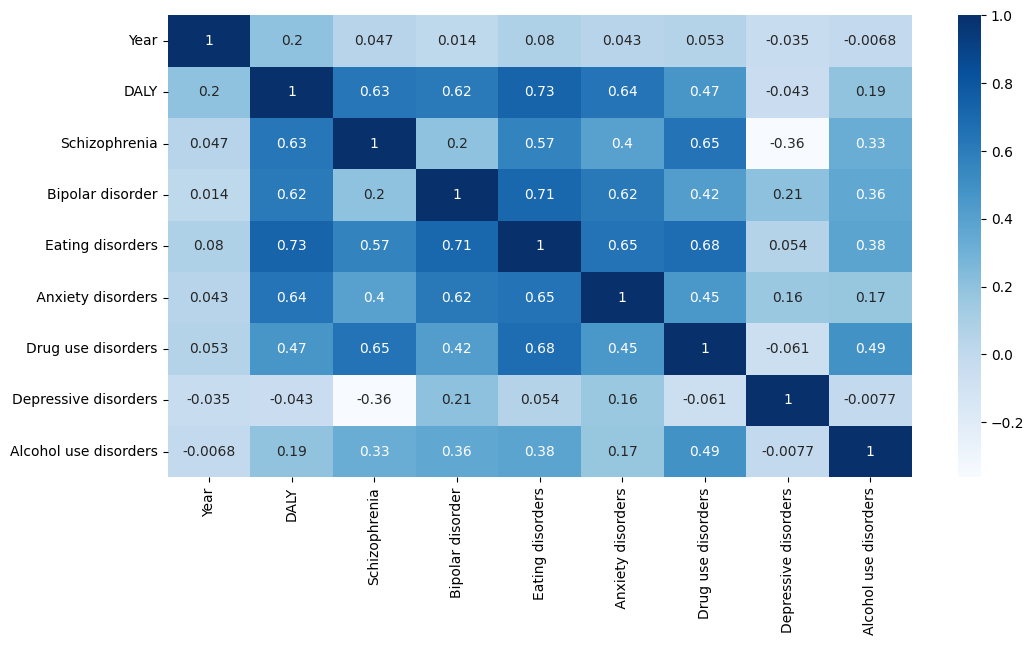

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(df_merged.corr(),annot=True,cmap='Blues')
plt.plot()

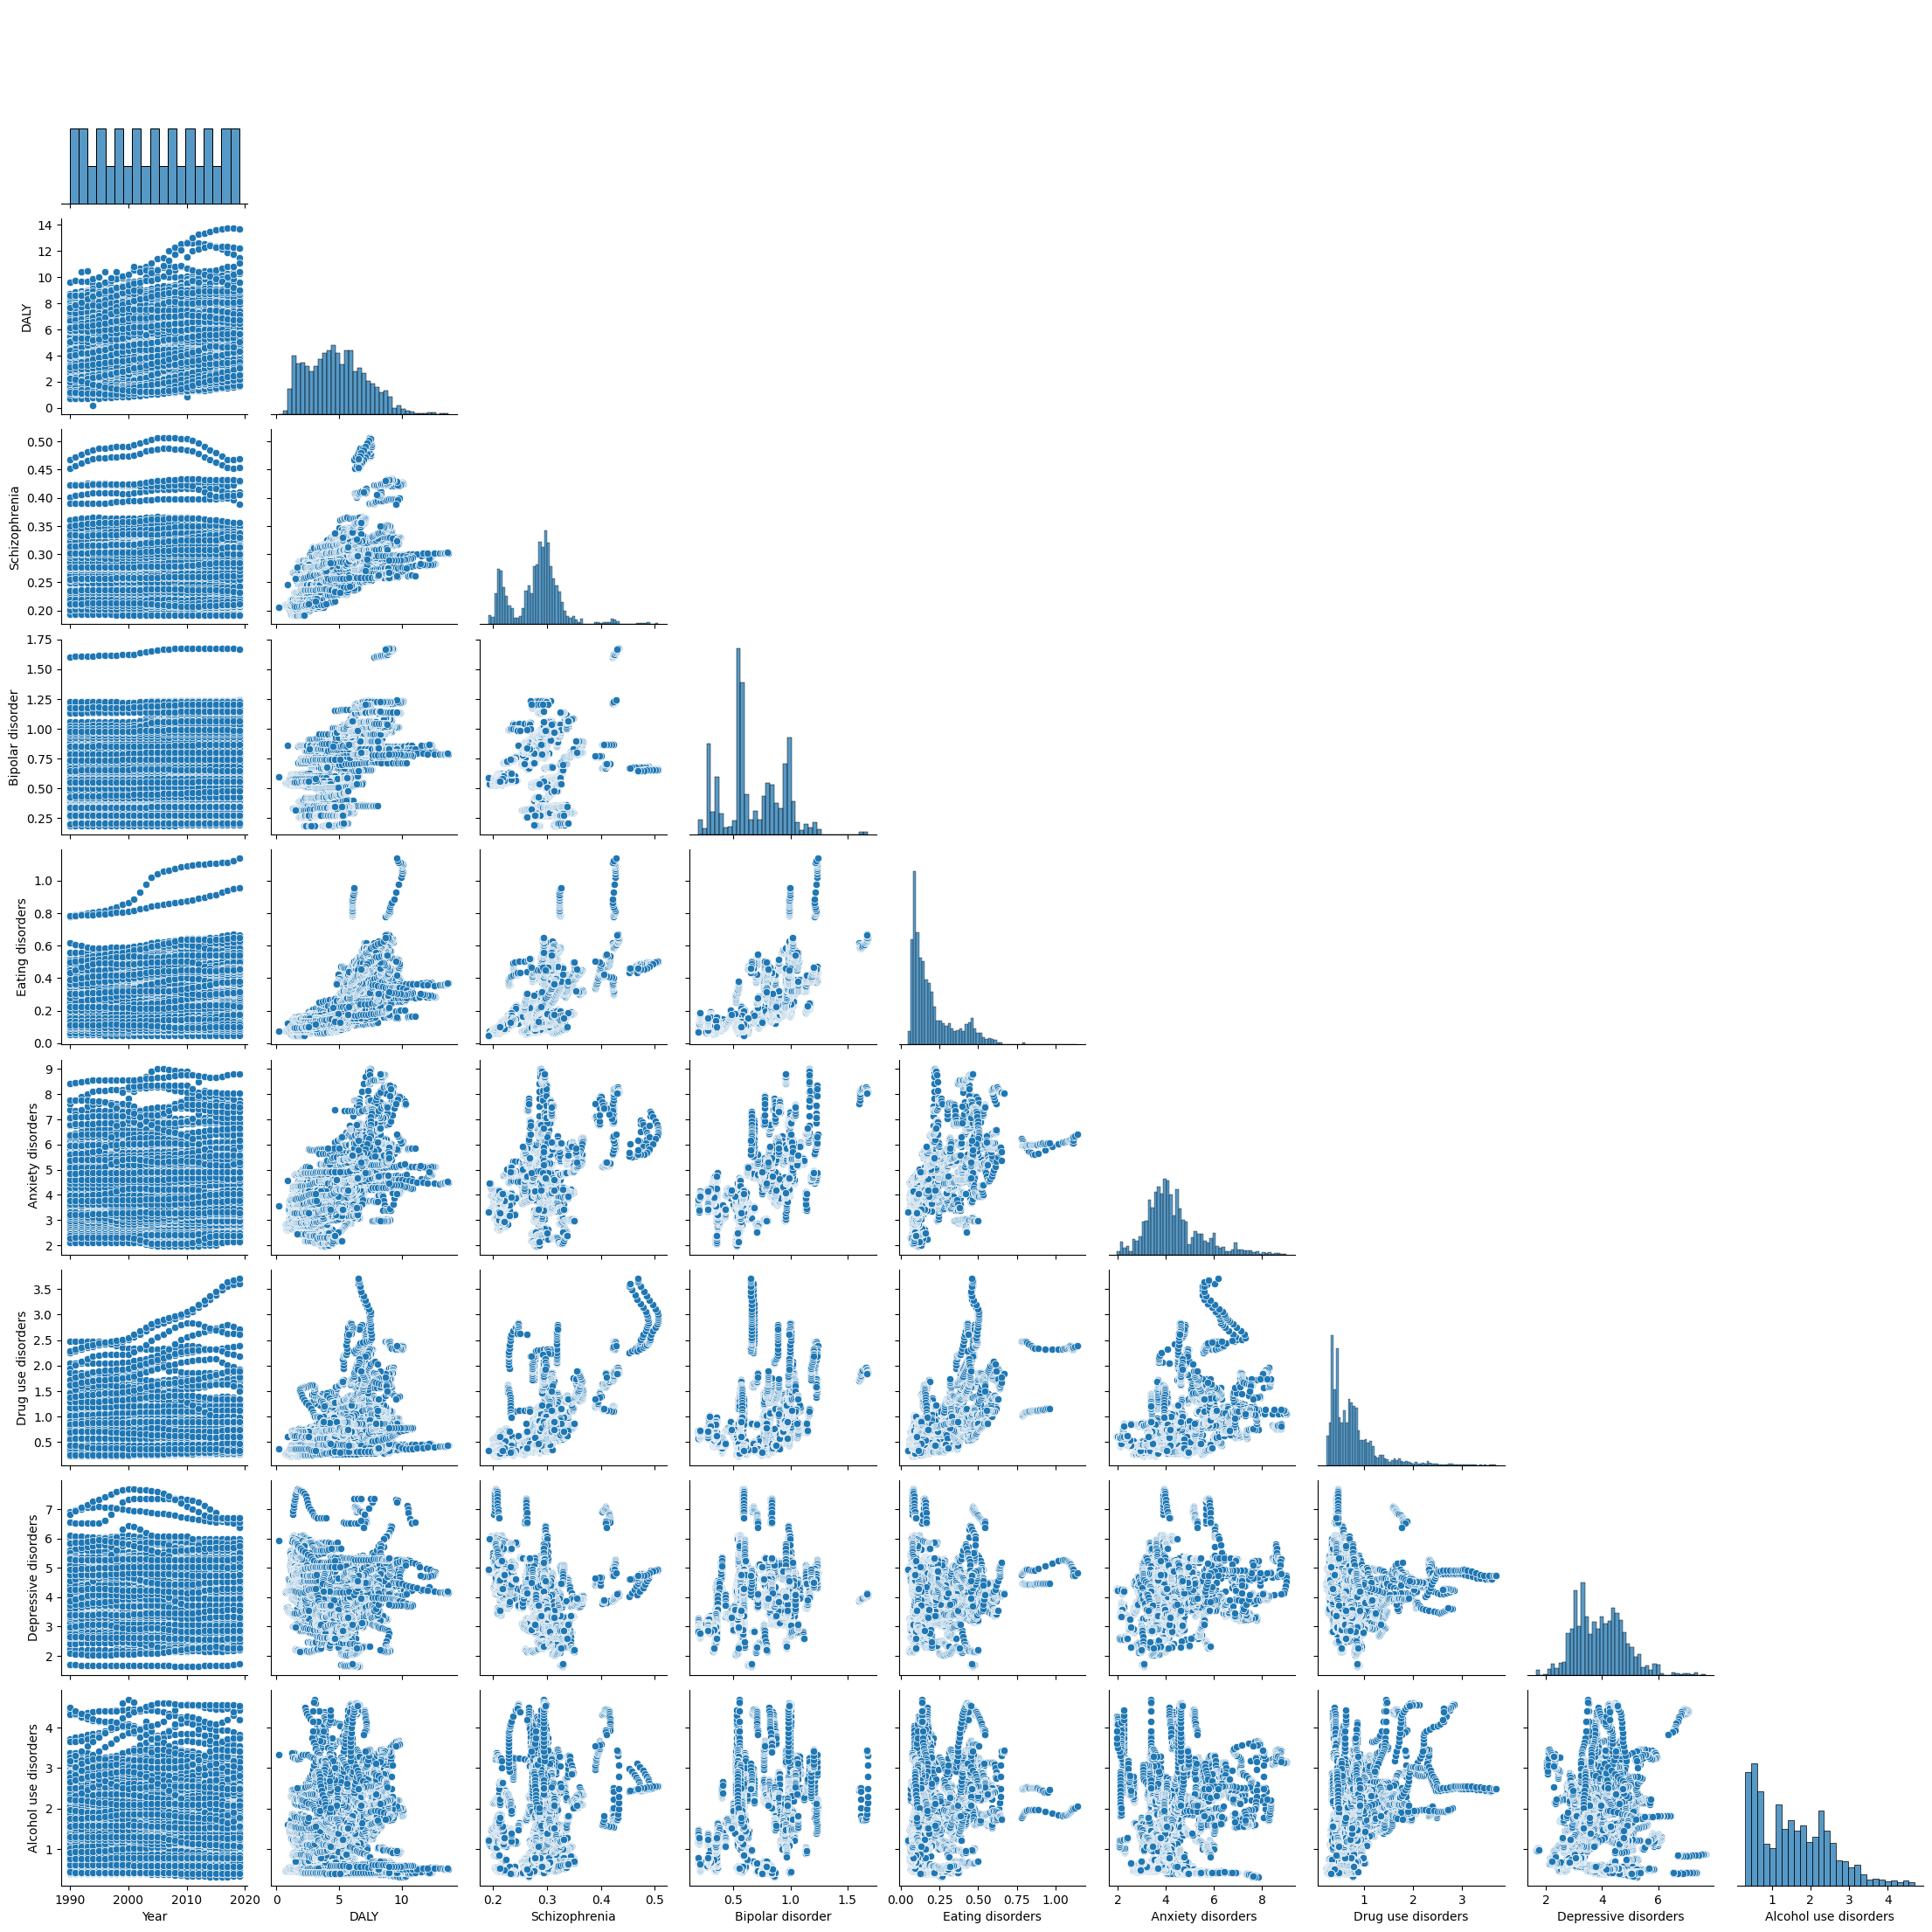

In [12]:
sns.pairplot(df_merged,corner=True)
plt.show()

In [15]:
mean=df_merged['DALY'].mean()
mean

4.818061811758918

In [17]:
import plotly.express as px
fig=px.pie(df_merged,values='DALY',names='Year')
fig.show()

In [22]:
# Split the dataset into features (X) and target variable (y)
X = df_merged[features]
y = df_merged['DALY']

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

In [55]:
# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
Score= r2_score(y_test,y_pred)
print('r2 Score of Model:', Score)

Mean Squared Error: 0.047675842048341535
r2 Score of Model: 0.9906272841381314


In [29]:
# Real-Time Tracking (Example: Predict mental fitness label for a new data point)
new_data = pd.DataFrame([[ 0.1, 0.2, 0.3, 0.4, 0.5,0.1,0.2]], columns=features)
prediction = model.predict(new_data)
print('Predicted Mental Fitness Label:', prediction)

Predicted Mental Fitness Label: [7.47633519]


In [35]:
#yearwise variation in Different countries mental fitness
fig=px.line_3d(df_merged,x='Year',y='DALY',z='Country',color='Country' ,markers=True,template='plotly_dark')
fig.show()

In [39]:
#yearwise variation in Different countries Schizophrenia
fig=px.line(df_merged,x='Year',y='Schizophrenia',color='Country' ,markers=True,template='plotly_dark')
fig.show()

In [42]:
#yearwise variation in Different countries Bipolar disorder
fig=px.line(df_merged,x='Year',y='Bipolar disorder',color='Country' ,markers=True,template='plotly_dark')
fig.show()

In [43]:
#yearwise variation in Different countries Eating disorders
fig=px.line(df_merged,x='Year',y='Eating disorders',color='Country' ,markers=True,template='plotly_dark')
fig.show()

In [48]:
#yearwise variation in Different countries Drug use disorder
fig=px.line(df_merged,x='Year',y='Drug use disorders',color='Country' ,markers=True,template='plotly_dark')
fig.show()

In [47]:
#yearwise variation in Different countries Anxiety disorder
fig=px.line(df_merged,x='Year',y=' Anxiety disorders',color='Country' ,markers=True,template='plotly_dark')
fig.show()

In [49]:
#yearwise variation in Different countries Depressive disorder
fig=px.line(df_merged,x='Year',y='Depressive disorders',color='Country' ,markers=True,template='plotly_dark')
fig.show()

In [50]:
#yearwise variation in Different countries Alcohol use disorder
fig=px.line(df_merged,x='Year',y='Alcohol use disorders',color='Country' ,markers=True,template='plotly_dark')
fig.show()